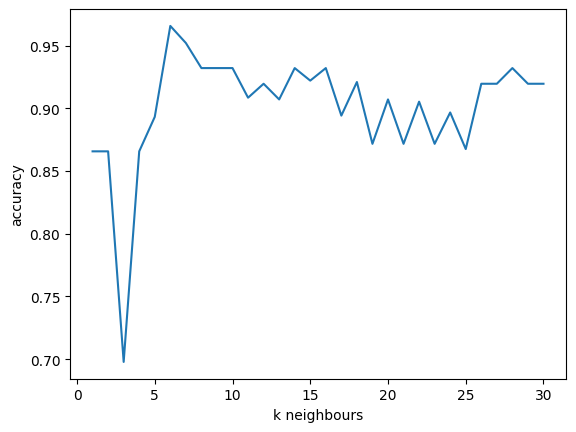

best # of neighbours k: 6
best cross validation accuracy: 0.9657142857142859
test accuracy: 0.7636363636363637


In [30]:
from google.colab import files
uploaded = files.upload()
%ls

import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter

def load_knn_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

def predict_knn(x, inputs, labels, k_neighbours):
  predicted_label = 0
  my_dict = {}
  for i in range(len(inputs)):
    my_dict[np.linalg.norm(x - inputs[i])] = labels[i]
  my_dict = dict(sorted(my_dict.items()))
  my_dict = dict(itertools.islice(my_dict.items(), k_neighbours))
  labels_list = list(my_dict.values())
  predicted_label = max(labels_list, key=labels_list.count)
  return predicted_label

def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbours):
  accuracy = 0
  for i in range(len(inputs)):
    if predict_knn(inputs[i], train_inputs, train_labels, k_neighbours) == labels[i]:
      accuracy += 1
  return accuracy/len(inputs)

def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
  best_hyperparam = 0
  best_accuracy = 0
  accuracies = np.zeros(len(hyperparameters))
  for hp in hyperparameters:
    tem_accuracy = 0
    for i in range(k_folds):
      one_fold = int(len(inputs)/k_folds)
      validation_inputs = inputs[i*one_fold::one_fold]
      validation_labels = labels[i*one_fold::one_fold]
      if i == 0:
        train_inputs = inputs[(i+1)*one_fold:]
        train_labels = labels[(i+1)*one_fold:]
      elif i == k_folds-1:
        train_inputs = inputs[:i*one_fold]
        train_labels = labels[:i*one_fold]
      else:
        train_inputs = np.concatenate((inputs[:i*one_fold], inputs[(i+1)*one_fold:]))
        train_labels = np.concatenate((labels[:i*one_fold], labels[(i+1)*one_fold:]))
      tem_accuracy += eval_knn(validation_inputs, validation_labels, train_inputs, train_labels, hp)
    accuracy = tem_accuracy/k_folds
    accuracies[hp-1] = accuracy
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_hyperparam = hp
  return best_hyperparam, best_accuracy, accuracies

def plot_knn_accuracies(accuracies,hyperparams):
  plt.plot(hyperparams,accuracies)
  plt.ylabel('accuracy')
  plt.xlabel('k neighbours')
  plt.show()

# load data
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()

# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
k_folds = 10
best_k_neighbours, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs, train_labels)

# plot results
plot_knn_accuracies(accuracies, hyperparams)
print('best # of neighbours k: ' + str(best_k_neighbours))
print('best cross validation accuracy: ' + str(best_accuracy))

# evaluate with best # of neighbours
accuracy = eval_knn(test_inputs, test_labels, train_inputs, train_labels, best_k_neighbours)
print('test accuracy: '+ str(accuracy))